In [28]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
dir(mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [6]:
mdata = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [11]:
mdata

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [10]:
print(len(mdata[0][1]))

60000


In [13]:
mdata[0][0].shape

(60000, 28, 28)

In [17]:
img = mdata[0][0][0]
print(mdata[0][1][0])

5


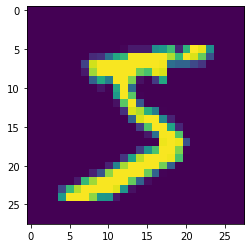

In [22]:
plt.imshow(img)

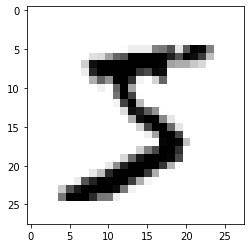

In [24]:
plt.imshow(img, cmap=plt.cm.binary)

In [25]:
def show_num(img, tag):
  plt.imshow(img, cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel('tag : '+str(tag), size=40)
  plt.show()

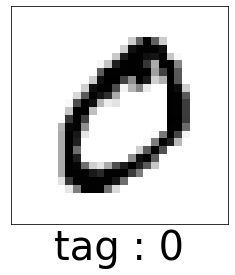

In [27]:
img = mdata[0][0][1]
tag = mdata[0][1][1]
show_num(img, tag)

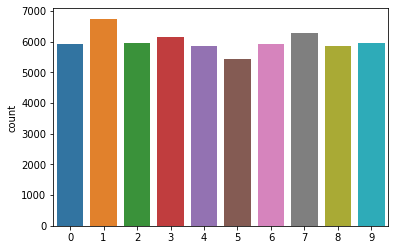

In [30]:
sns.countplot(mdata[0][1])

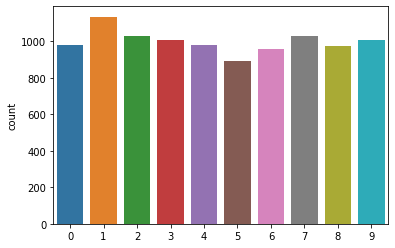

In [34]:
sns.countplot(mdata[1][1])

In [35]:
(x_train, y_train), (x_text, y_text) = mdata

In [37]:
print(len(x_train))
print(len(x_text))

60000
10000


In [38]:
x_train, x_text = x_train/255.0, x_text/255.0

In [41]:
x_train[0].max()

1.0

In [42]:
x_train[0].min()

0.0

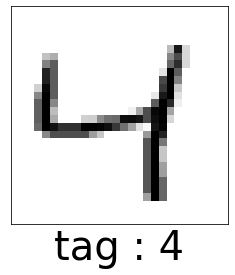

In [46]:
show_num(x_train[2], y_train[2])

In [52]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(10, activation='softmax')
])

In [53]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2960 - accuracy: 0.9136
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1442 - accuracy: 0.9573
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1077 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0866 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0740 - accuracy: 0.9770


In [55]:
model.evaluate(x_text, y_text, verbose=2)

313/313 - 0s - loss: 0.0710 - accuracy: 0.9780


[0.07099248468875885, 0.9779999852180481]

In [57]:
result = model.predict(x_text)

In [59]:
i = result[0].max()

In [61]:
result[0].tolist().index(i)

7

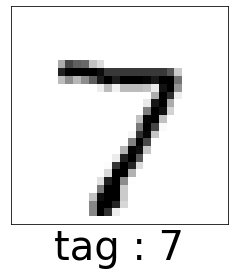

In [62]:
show_num(x_text[0], y_text[0])